<a href="https://colab.research.google.com/github/semogela/python-licoes/blob/main/Exerc%C3%ADcios_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando base de dados de um link de dados sobre frutas no GitHub.

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'

Importando biblioteca NumPy.

In [ ]:
import numpy as np

Utilizando a função np.loadtxt para transformar os dados da url em array, neste trecho estou delimitando a separação dos dados por vírgula, pulando a primeira linha (de títulos) e a primeira coluna (que seriam os nomes das frutas).

In [ ]:
dados = np.loadtxt(url, delimiter=',', skiprows=1, usecols=np.arange(1,6,1))
dados.shape

(10000, 5)

Separando em variáveis informaçóes de diâmetro e peso das laranjas e toranjas.

In [ ]:
diametro_laranja = dados[0:4999,0]
peso_laranja = dados[0:4999,1]

In [ ]:
diametro_toranja = dados[5000:,0]
peso_toranja = dados[5000:,1]

Importando a biblioteca matplotlib.pyplot.

In [ ]:
import matplotlib.pyplot as plt

Plotando o gráfico de linhas, que relaciona a massa das frutas com os diâmetros. Uma coisa engraçada desses dados é que, considerando as frutas como esféricas, a massa delas seria dada pela densidade*volume. E, sem fazer cálculo algum (posso deixar isso para análises futuras, por diversão), me parece que a massa varia muito pouco com a variação do diâmetro para os dois casos. A densidade está diminuindo?

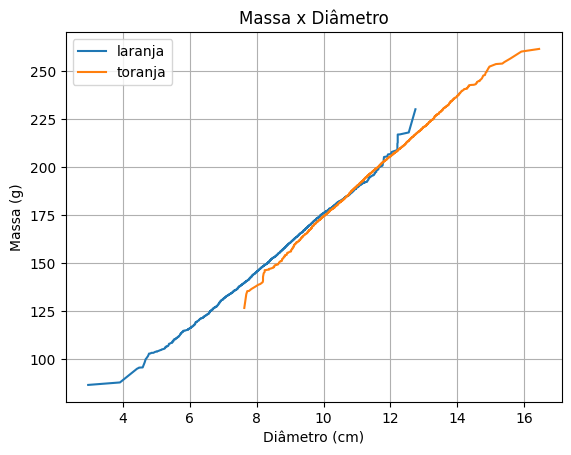

In [ ]:
plt.plot(diametro_laranja,peso_laranja)
plt.plot(diametro_toranja,peso_toranja)
plt.title('Massa x Diâmetro')
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Massa (g)')
plt.grid()
plt.legend(['laranja', 'toranja'])
plt.show()

Não me aguentei e dei uma checada. Transferi as informações para o SI, para evitar erros.

In [ ]:
import math

In [ ]:
volumemenor = (math.pow(diametro_laranja[0]/(100),3)*np.pi)/6
volumemaior = (math.pow(diametro_laranja[4998]/(100),3)*np.pi)/6
print(volumemenor, volumemaior)

1.3579186575554885e-05 0.0010852484559670304


In [ ]:
densidademenor = (peso_laranja[0]/1000)/volumemenor
densidademaior = (peso_laranja[4998]/1000)/volumemaior
print(densidademenor, densidademaior)

6389.189773427554 212.0528241571544


Vou tentar plotar um gráfico ideal, para a densidade se manter constante. Considerando um diâmetro inicial de 3cm e indo até 11cm, com saltos de 0.01cm, considerando a densidade de uma laranja de 768kg/m³. A ideia é plotar um gráfico que se comporte como uma curva de polinômio de grau 3.

In [9]:
diametro = np.arange(3, 11, 0.01)
diametro.shape


(800,)

In [10]:
massa = list(range(len(diametro)))
for i in range(len(diametro)):
  massa[i] = 768*(math.pow(diametro[i]/100,3)*np.pi/6)

massa = np.array(massa)
massa.shape

(800,)

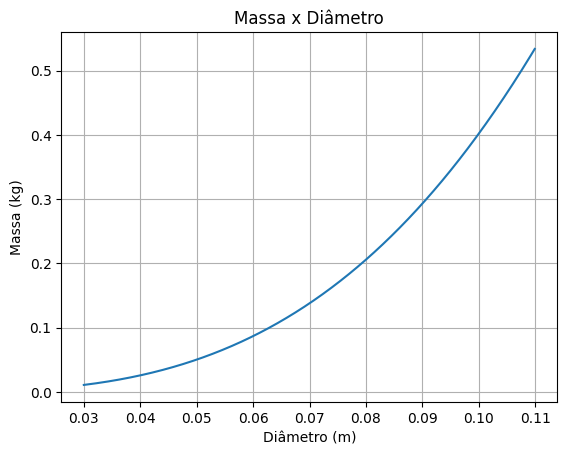

In [11]:
plt.plot(diametro/100,massa)
plt.title('Massa x Diâmetro')
plt.xlabel('Diâmetro (m)')
plt.ylabel('Massa (kg)')
plt.grid()
plt.show()